# CSE 152A: Discussion Week 8: PyTorch Tutorials
Adapted from: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

## **Part 0: Set-up**
### First, lets import PyTorch and some useful functions/objects

In [1]:
import torch # Main torch package
from torch import nn # Importing specifically the nn class of the torch library, this will make our code more consise later on
from torch.utils.data import DataLoader # Importing the DataLoader class
from torchvision import datasets # Used for importing built-in datasets
from torchvision.transforms import ToTensor # Used to transform data to tensors (the main object in PyTorch)
import matplotlib.pyplot as plt # Plotting
import numpy as np
from tqdm import tqdm # Progress bar

###  Let's specify a variable to use GPU if available and CPU if not. CUDA is the API for working with NVIDIA GPUs. There is good support in Pytorch to work with CUDA and NVIDIA GPUs.

In [2]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

print(f"The device currently available is: {device}")
!nvidia-smi # This will show information about your GPU if there is one available

The device currently available is: cuda
Mon Feb 26 10:36:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+---------------------------

### If you have "cpu", then it means that there is no GPU currently available that CUDA can find. This is because in Google Colab, we need to activate it.

**NOTE: There is a time limit for GPU usage per day. If you reach this time limit while doing the HW, we do NOT expect you to purchase a subscription to Colab Pro. Please just save your notebook and copy it over to another Gmail account and work on it there while your school Google account is on cooldown.**

### To activate it, we can click at the top: Runtime -> Change Runtime Type -> Select T4 GPU under the Hardware Accelerator selection. You will probably need to run your cells again.

### At this point, you should hopefully see that the device currently available is cuda!

### **Tensors**

The main object in PyTorch are tensors, similar to Numpy ndarrays. Main difference is PyTorch has built-in GPU/hardware acceleration support. You can also easily switch between PyTorch tensors and Numpy ndarrays.

[Bridging Numpy and PyTorch](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#bridge-to-np-label)

In [3]:
# Initializing a tensor
data = torch.tensor([
    [1,2],
    [3,4]
])
print(data)
print(data.shape)
print()

# Starting with a numpy array
np_arr = np.array([
    [1,2],
    [3,4]
])
data = torch.tensor(np_arr)
print(data)
print(data.shape)
print()

# And switch back
np_arr = data.numpy()
print(np_arr)
print(np_arr.shape)
print()

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])

tensor([[1, 2],
        [3, 4]])
torch.Size([2, 2])

[[1 2]
 [3 4]]
(2, 2)



## **Part 1: Initializing your dataset**
### Your dataset will determine some of how your network needs to be set-up. There are two main objects you need to set-up: the Dataset and DataLoader. Pytorch has a few datasets built into it, so we will use the CIFAR-10 dataset for this tutorial. You can read more in the tutorials about how to initialize your own Dataset and Dataloaders for custom data.

Files already downloaded and verified
Files already downloaded and verified
Shape of X [N, C, H, W]: torch.Size([128, 3, 32, 32])
Shape of y: torch.Size([128]) torch.int64
This image is of class 8


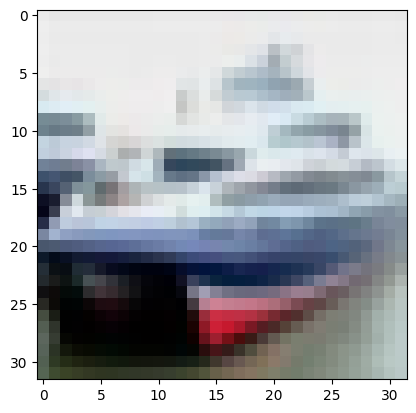

In [8]:
# Download datasets
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

testing_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Create data loaders
batch_size = 128
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(testing_data, batch_size=batch_size)

for X,y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")

    plt.imshow(X[1,:,:,:].permute(1,2,0)) # Show an image from our dataset
    print(f"This image is of class {y[1]}")
    break

### At this point, we have downloaded our data and set-up our data loaders. You can see that we can do .shape on these tensor objects just like Numpy, however note the dimensions are probably not in the order you are expecting. Here, we have shape (batch_size, channels, height, width). Channels is the third dimension of your images (think RGB). Height and width are specified last in the dimensions. Many PyTorch functions *expect* the input to be this way.

## **Part 2: Defining your network**

### Each network/layer in PyTorch should be defined inside of a class that inherits from nn.Module. There are then two things we need to do: Initialize the layers inside of the constructor, and specify how data should pass through the network in the forward function.

### I have intentionally created a small and simple network to get the PyTorch concepts across and will obtain somewhat poor accuracy. In HW4, we will improve upon this.

[Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

[Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

[ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)

[Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)


In [9]:
class MyNetwork(nn.Module):
  def __init__(self):
    """
    This is the constructor of our neural network. Inside of it, we should
    specify all of the layers that are used to build the model.

    Lets say that we want to create a network with 2 convolutional layers
    and 3 fully-connected layers. For now:

    1. Conv2d: 8 output channels, kernel of size 3, no padding, no stride (takes the image data as input)
    2. Conv2d: 16 output channels, kernel of size, no padding, no stride
    3. Linear: 1028 output features
    4. Linear: 128 output features
    5. Linear: 10 output features (This is produces our predictions)

    With ReLU activation function after each convolutional and linear layer.
    """
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1) # Convolutional layer 1: in_channels depends on input data
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1) # Convolutional layer 2: in_channels depends on output from conv1
    self.fc1 = nn.Linear(in_features=16*28*28, out_features=1028) # Fully connected layer 1: Must flatten tensor from conv1 before passing to fc1 (in_features)
    self.fc2 = nn.Linear(in_features=1028, out_features=128) # Fully connected layer 2: in_features only depends on fc1
    self.fc3 = nn.Linear(in_features=128, out_features=10) # Fully connected layer 3: in_features only depends on fc2

    self.relu = nn.ReLU() # ReLU activation function (can be used multiple times since no parameters)
    self.flatten = nn.Flatten() # Used for flattening the tensor for fc layers

  def forward(self, x):
    """
    Here, we should specify how our model takes in our input data x
    and feeds it through the network. In this case, x will
    be the images obtained from the data loader (tensors).
    """
    x = self.conv1(x)
    x = self.relu(x)

    x = self.conv2(x)
    x = self.relu(x)

    x = self.flatten(x)

    x = self.fc1(x)
    x = self.relu(x)

    out = self.fc2(x)
    return out # Note: We do not need to apply an activation function to the output of the network


# Now we can instantiate a network:
model = MyNetwork() # Create/Initialze the model
model.to(device) # Send the model to the device we've chosen (either GPU or CPU depending on what's available)
print(model)

MyNetwork(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=1028, bias=True)
  (fc2): Linear(in_features=1028, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)


## **Part 3: Training and Evaluating**

After we've set-up our network, they currently have randomly initialized weights. We need to optimize the network for our problem (classification). So, we need to decide on our loss function, the optimizer we will use, and then just feed our data through.

[Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)

[CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

In [10]:
loss_fn = nn.CrossEntropyLoss() # Initialize our loss function
optimizer = torch.optim.Adam(model.parameters()) # Initialize our optimizer -- we pass in the parameters that we want to optimize

def train(dataloader, model, loss_fn, optimizer, device):
  """
  This function will perform the optimization/training of the network
  """
  size = len(dataloader.dataset) # Grab the total number of images
  model.train() # Set the model to training mode (parameters can be updated and gradients are calculated)
  loss_history = []

  # Now, we loop over our training data, pass in a batch, calculate the loss,
  # calculate gradients, and update the our weights through the optimizer
  for batch, (X, y) in enumerate(dataloader):
    # Zero out the gradients
    optimizer.zero_grad()

    # First, we need to move the data to the same device as the model
    # Ideally, everything is done on GPU
    X, y = X.to(device), y.to(device)

    # Then, we can just pass the data through the model (forward)
    pred = model(X)

    # and calculate the loss
    loss = loss_fn(pred, y)

    # Now, we can calculate the gradients through backpropagation
    loss.backward()

    # Take a step along the direction of the gradient (minimize)
    optimizer.step()

    # Logging
    loss, current = loss.item(), (batch+1)*len(X)
    if batch % 100 == 0:
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    loss_history.append(loss)

  return loss_history

def test(dataloader, model, loss_fn, device):
  """
  This function will test/evaluate our network after training
  """
  size = len(dataloader.dataset) # Grab the total number of images
  num_batches = len(dataloader) # Grab the total number of batches
  model.eval() # Set the network to eval mode
  test_loss, correct = 0.0, 0.0
  with torch.no_grad(): # Ensure we do not calculate gradients
    for X, y in dataloader:

      # Send data to same device as model
      X, y = X.to(device), y.to(device)

      # Pass the data through the model
      pred = model(X)

      # Compute the loss on the test set
      test_loss += loss_fn(pred, y).item()

      # Compute the number of correct predictions
      correct += (pred.argmax(dim=1) == y).type(torch.float).sum().item()

  # Get the average test loss
  test_loss /= num_batches

  # Compute the accuracy
  acc = correct / size

  print(f"Test Error: \n Accuracy: {(100*acc):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [11]:
# Now, we can just call the functions we've written

# Training
epochs = 3
train_loss = []
for t in range(epochs):
  train_loss += train(train_dataloader, model, loss_fn, optimizer, device)

  # Testing
  print(f"\nEpoch {t}:")
  test(test_dataloader, model, loss_fn, device)

loss: 4.848330  [  128/50000]
loss: 1.646089  [12928/50000]
loss: 1.568011  [25728/50000]
loss: 1.419213  [38528/50000]

Epoch 0:
Test Error: 
 Accuracy: 50.8%, Avg loss: 1.379086 

loss: 1.261706  [  128/50000]
loss: 1.301290  [12928/50000]
loss: 1.323662  [25728/50000]
loss: 1.173214  [38528/50000]

Epoch 1:
Test Error: 
 Accuracy: 56.6%, Avg loss: 1.226809 

loss: 1.022075  [  128/50000]
loss: 1.074633  [12928/50000]
loss: 1.146809  [25728/50000]
loss: 0.955620  [38528/50000]

Epoch 2:
Test Error: 
 Accuracy: 59.9%, Avg loss: 1.132894 



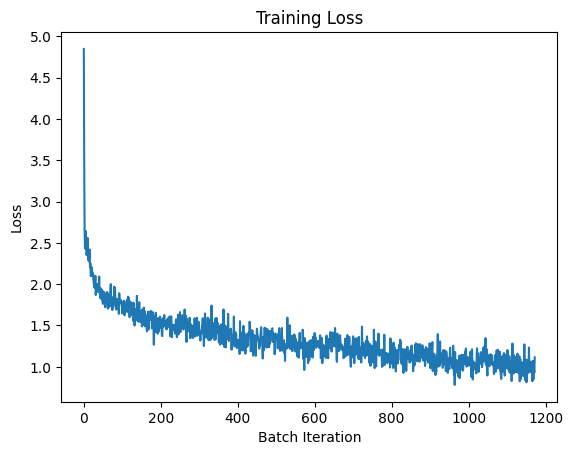

In [12]:
# Now, we can plot our training loss
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Batch Iteration")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

## We have now completed a quick-start tutorial on creating a CNN and training it! Let's briefly talk about gradient calculation in PyTorch.

## **Autograd**
###Now we can briefly discuss automatic differentiation and gradients. Remember the loss_fn.backward()? This calculated the gradients of each parameter in our network using *backpropagation* (we will discuss this in lecture). PyTorch has automatic differentiation built-in to it.
[Automatic differentiation with autograd](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)